In [1]:
using Distributions
using SpecialFunctions
using StatsPlots
default(fmt=:png)

In [2]:
module O

using Distributions
using SpecialFunctions: erf, erfinv

struct MyNormal{T<:Real} <: ContinuousUnivariateDistribution
    μ::T
    σ::T
end

MyNormal(μ::Real, σ::Real) = MyNormal(promote(μ, σ)...)
MyNormal(μ::Integer, σ::Integer) = Normal(float(μ), float(σ))

Distributions.params(d::MyNormal) = (d.μ, d.σ)
Distributions.mean(d::MyNormal) = d.μ
Distributions.std(d::MyNormal) = d.σ
Distributions.var(d::MyNormal) = d.σ^2

function Distributions.logpdf(d::MyNormal, x::Real)
    μ, σ = params(d)
    -((x - μ)^2/σ^2 + log(2π*σ^2))/2
end

function Distributions.cdf(d::MyNormal, x::Real)
    μ, σ = params(d)
    (erf((x - μ)/(√2*σ)) + 1)/2
end

function Distributions.quantile(d::MyNormal, p::Real)
    μ, σ = params(d)
    μ + √2 * σ * erfinv(2p - 1)
end

Distributions.maximum(d::MyNormal{T}) where T<:Real = T(Inf)
Distributions.minimum(d::MyNormal{T}) where T<:Real = T(-Inf)

end

Main.O

In [3]:
O.MyNormal(3, 2)

Normal{Float64}(μ=3.0, σ=2.0)

In [4]:
mean(O.MyNormal(3, 2)), std(O.MyNormal(3, 2)), var(O.MyNormal(3, 2))

(3.0, 2.0, 4.0)

In [5]:
logpdf(O.MyNormal(3, 2), 1), logpdf(Normal(3, 2), 1)

(-2.112085713764618, -2.112085713764618)

In [6]:
pdf(O.MyNormal(3, 2), 1), pdf(Normal(3, 2), 1)

(0.12098536225957168, 0.12098536225957168)

In [7]:
logcdf(O.MyNormal(3, 2), 1), logcdf(Normal(3, 2), 1)

(-1.841021645009264, -1.841021645009264)

In [8]:
cdf(O.MyNormal(3, 2), 1), cdf(Normal(3, 2), 1)

(0.15865525393145702, 0.15865525393145702)

In [9]:
quantile(O.MyNormal(3, 2), 0.158655), quantile(Normal(3, 2), 0.158655)

(0.9999979011379097, 0.9999979011379097)

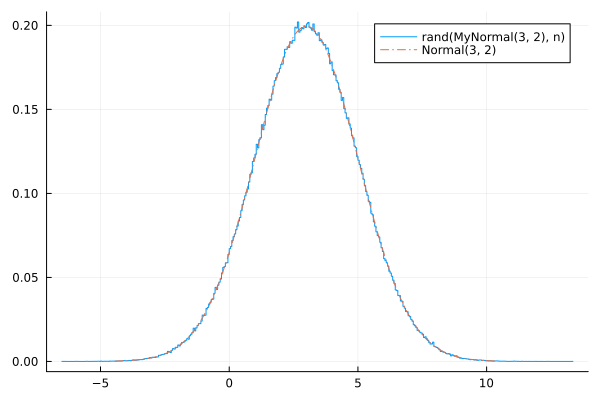

In [10]:
n = 10^6
X = rand(O.MyNormal(3, 2), n)
#Y = rand(Normal(3, 2), n)

stephist(X; norm=true, label="rand(MyNormal(3, 2), n)")
#stephist!(Y; norm=true, label="rand(Normal(3, 2), n)", ls=:dash)
plot!(Normal(3, 2); label="Normal(3, 2)", ls=:dashdot)

In [11]:
extrema(O.MyNormal(3, 2))

(-Inf, Inf)

In [12]:
insupport(O.MyNormal(3, 2), 1)

true